In [1]:
# Importing libraries
# -------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# ---------------------
dataset = pd.read_csv('../../data_files/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

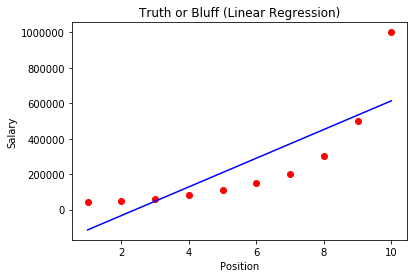

In [7]:
# Visualising the Linear Regression results
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

A regressão linear, como podemos ver não é um bom modelo.

Text(0, 0.5, 'Salary')

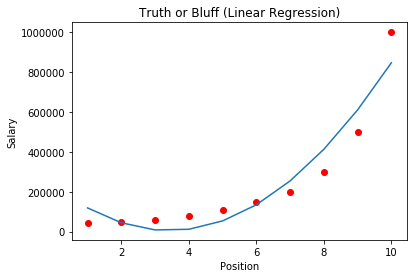

In [8]:
# Visualising the Polynomial Regression results
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X))) # X_poli não foi usado porque na pratica poderiamos ter adicionado novos dados para X e X_poli estaria desatualizado.
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')

Ficou bem melhor! Mais ainda não está muito bom

In [9]:
# Fitting Polynomial Regression to the dataset with degree=3
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Salary')

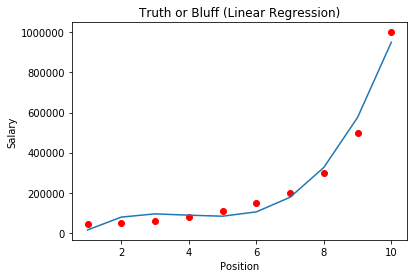

In [10]:
# Visualising the Polynomial Regression results
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')

Melhorou bastante! Agora parece estar bom

In [11]:
# Fitting Polynomial Regression to the dataset with degree=3
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Salary')

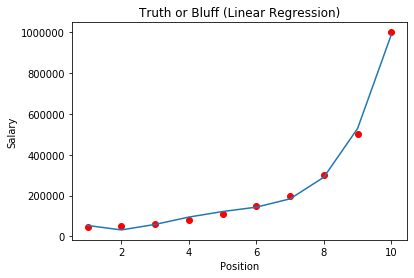

In [12]:
# Visualising the Polynomial Regression results
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')

Agora está perfeito!!!

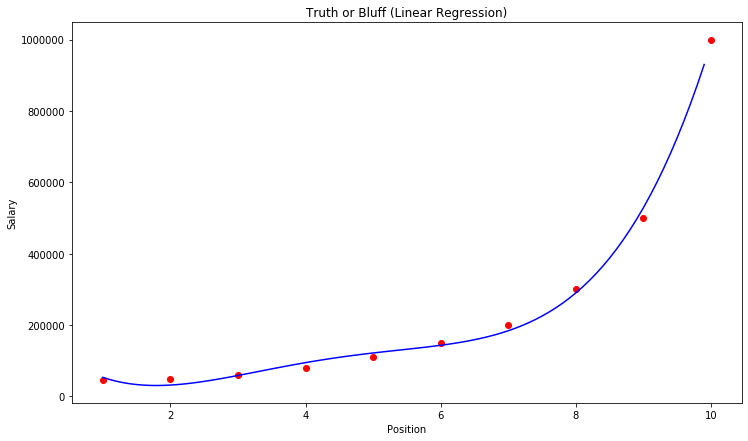

In [13]:
# Visualising the Polynomial Regression results with degree=4
plt.figure(figsize=(12,7))
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [14]:
# Applying K-Fold Cross Validation
from sklearn.model_selection import cross_val_score

In [ ]:

accuracies = cross_val_score(estimator=lin_reg_2, X=X_train, y=y_train, cv=10)
accuracies.mean()